# 偏移量 DataOffset

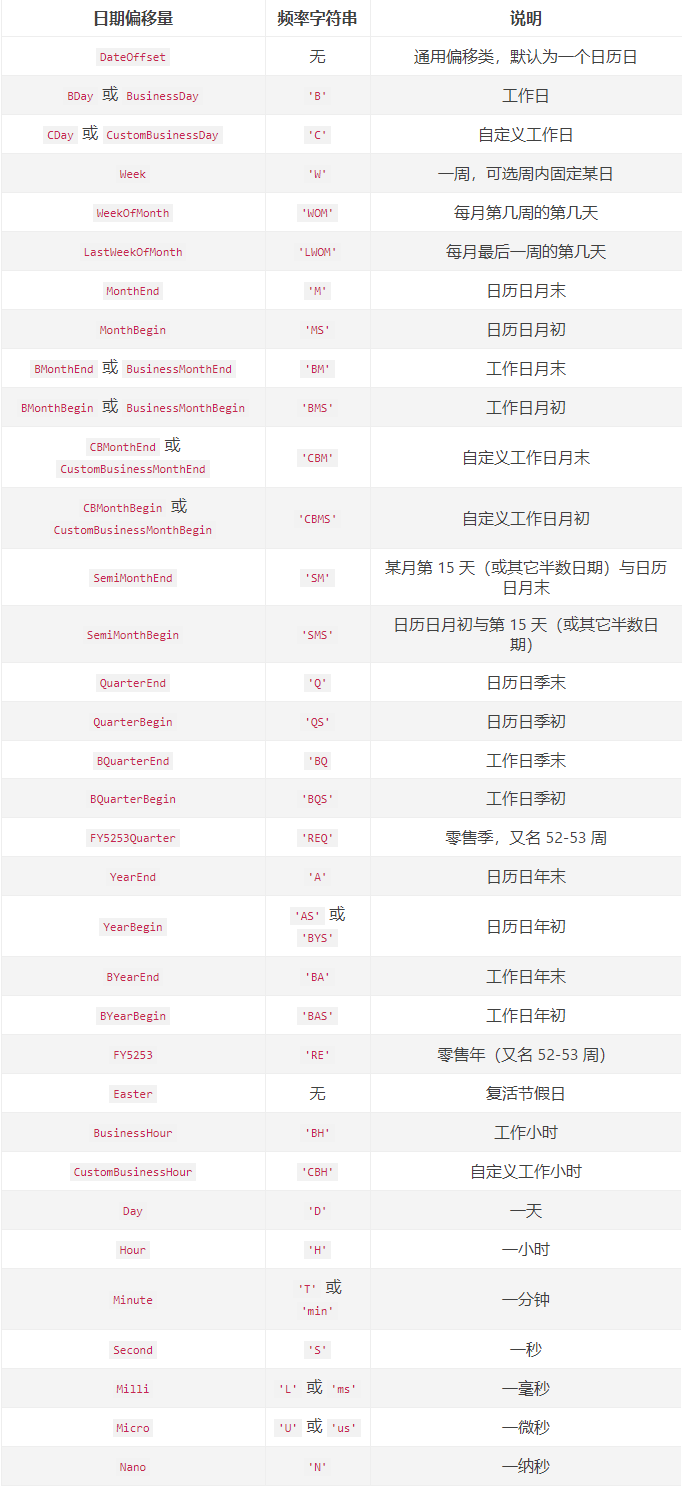

In [4]:
import numpy as np
import pandas as pd

In [5]:
rng = pd.date_range(start='2011-01-01', end='2012-01-01', freq='BM')
rng

DatetimeIndex(['2011-01-31', '2011-02-28', '2011-03-31', '2011-04-29',
               '2011-05-31', '2011-06-30', '2011-07-29', '2011-08-31',
               '2011-09-30', '2011-10-31', '2011-11-30', '2011-12-30'],
              dtype='datetime64[ns]', freq='BM')

In [8]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2011-01-31    0.622391
2011-02-28   -0.442165
2011-03-31   -0.275813
2011-04-29   -0.184494
2011-05-31   -0.597422
2011-06-30    0.716809
2011-07-29   -1.736838
2011-08-31   -0.828685
2011-09-30    0.928033
2011-10-31    0.595697
2011-11-30   -0.186237
2011-12-30   -1.663403
Freq: BM, dtype: float64

In [9]:
ts.index

DatetimeIndex(['2011-01-31', '2011-02-28', '2011-03-31', '2011-04-29',
               '2011-05-31', '2011-06-30', '2011-07-29', '2011-08-31',
               '2011-09-30', '2011-10-31', '2011-11-30', '2011-12-30'],
              dtype='datetime64[ns]', freq='BM')

In [27]:
# 索引的精度
ts.index.resolution

'day'

# 切片操作

In [11]:
ts[:5].index

DatetimeIndex(['2011-01-31', '2011-02-28', '2011-03-31', '2011-04-29',
               '2011-05-31'],
              dtype='datetime64[ns]', freq='BM')

In [12]:
ts[::2].index

DatetimeIndex(['2011-01-31', '2011-03-31', '2011-05-31', '2011-07-29',
               '2011-09-30', '2011-11-30'],
              dtype='datetime64[ns]', freq='2BM')

# 能解析为时间戳的日期与字符串可以作为索引的参数

In [13]:
ts['1/31/2011']

0.622391066098428

In [14]:
ts['31/1/2011']

0.622391066098428

In [17]:
import datetime
ts[datetime.datetime(2011, 11, 25) : ]

2011-11-30   -0.186237
2011-12-30   -1.663403
Freq: BM, dtype: float64

In [18]:
ts['10/31/2011' : '12/31/2011']

2011-10-31    0.595697
2011-11-30   -0.186237
2011-12-30   -1.663403
Freq: BM, dtype: float64

In [24]:
ts['2011-03' : '2011-8-30']

2011-03-31   -0.275813
2011-04-29   -0.184494
2011-05-31   -0.597422
2011-06-30    0.716809
2011-07-29   -1.736838
Freq: BM, dtype: float64

# 通过部分时间字符串筛选

In [19]:
ts['2011']

2011-01-31    0.622391
2011-02-28   -0.442165
2011-03-31   -0.275813
2011-04-29   -0.184494
2011-05-31   -0.597422
2011-06-30    0.716809
2011-07-29   -1.736838
2011-08-31   -0.828685
2011-09-30    0.928033
2011-10-31    0.595697
2011-11-30   -0.186237
2011-12-30   -1.663403
Freq: BM, dtype: float64

In [21]:
ts['2011-06']

2011-06-30    0.716809
Freq: BM, dtype: float64

# 精准匹配
> 字符串既可以用于切片，也可用于精准匹配
> + 字符串精度比索引精度低，就是切片
> + 字符串精度比索引精度高，则是精准匹配

In [31]:
series_minute = pd.Series([1, 2, 3], 
                         pd.DatetimeIndex(['2011-12-31 23:59:00',
                                          '2012-01-01 00:00:00',
                                          '2012-01-01 00:02:00']))
# 时间戳字符串精度："分"
series_minute.index.resolution

'minute'

In [38]:
series_second = pd.Series([1, 2, 3], 
                         pd.DatetimeIndex(['2011-12-31 23:59:00',
                                          '2012-01-01 00:00:00',
                                          '2012-01-01 00:02:01']))
# 时间戳字符串精度："秒"
series_second.index.resolution

'second'

In [33]:
# 给定的字符串"2011-12-31 23" 精度没有 series.index.resolution 高，返回的是一个切片

series_minute['2011-12-31 23']

2011-12-31 23:59:00    1
dtype: int64

In [34]:
# 给定的字符串"2011-12-31 23:59" 精度高于或等于 series.index.resolution 时，返回的是一个标量

series_minute['2011-12-31 23:59']

1

In [37]:
series_minute['2011-12-31 23:59:00']

1

In [39]:
df_minute = pd.DataFrame({'a' : [1, 2, 3], 'b' : [4, 5, 6]}, index=series_minute.index)
df_minute

,a,b
2011-12-31 23:59:00,1,4
2012-01-01 00:00:00,2,5
2012-01-01 00:02:00,3,6


In [42]:
df_minute.index.resolution

'minute'

In [40]:
# 执行的是切片操作

df_minute['2011-12-31 23']

,a,b
2011-12-31 23:59:00,1,4


In [41]:
# 执行的是精确匹配(返回的应该是一个series)
# 在 Pandas 中默认'[]'是按列取值，所以会触发 KeyError

df_minute['2011-12-31 23:59']

KeyError: '2011-12-31 23:59'

In [43]:
# 为了实现精准匹配，要用'.loc'对·行·进行操作

df_minute.loc['2011-12-31 23:59']

a    1
b    4
Name: 2011-12-31 23:59:00, dtype: int64

In [44]:
# 注意：DatetimeIndex 精度不能低于`日`

series_monthly = pd.Series([1, 2, 3], pd.DatetimeIndex(['2011-12', '2012-01', '2012-02']))
series_monthly.index.resolution

'day'

In [46]:
# 切片操作

series_monthly['2011-12']

2011-12-01    1
dtype: int64

In [49]:
# 精准匹配

series_monthly['2011-12-1']

1

In [50]:
rng2 = pd.date_range('2011-01-01', '2012-01-01', freq='W')
rng2

DatetimeIndex(['2011-01-02', '2011-01-09', '2011-01-16', '2011-01-23',
               '2011-01-30', '2011-02-06', '2011-02-13', '2011-02-20',
               '2011-02-27', '2011-03-06', '2011-03-13', '2011-03-20',
               '2011-03-27', '2011-04-03', '2011-04-10', '2011-04-17',
               '2011-04-24', '2011-05-01', '2011-05-08', '2011-05-15',
               '2011-05-22', '2011-05-29', '2011-06-05', '2011-06-12',
               '2011-06-19', '2011-06-26', '2011-07-03', '2011-07-10',
               '2011-07-17', '2011-07-24', '2011-07-31', '2011-08-07',
               '2011-08-14', '2011-08-21', '2011-08-28', '2011-09-04',
               '2011-09-11', '2011-09-18', '2011-09-25', '2011-10-02',
               '2011-10-09', '2011-10-16', '2011-10-23', '2011-10-30',
               '2011-11-06', '2011-11-13', '2011-11-20', '2011-11-27',
               '2011-12-04', '2011-12-11', '2011-12-18', '2011-12-25',
               '2012-01-01'],
              dtype='datetime64[ns]', freq='W-S

In [62]:
ts2 = pd.Series(np.random.randn(len(rng2)), index=rng2)

In [59]:
ts2.index.resolution

'day'

In [53]:
# truncate 假设DatetimeIndex里未标明时间组件的值为 0

ts2.truncate(before='2011-11', after='2011-12')

2011-11-06    0.391935
2011-11-13    0.220700
2011-11-20    0.195578
2011-11-27   -0.494779
Freq: W-SUN, dtype: float64

In [54]:
ts2.truncate(before='2011-11-13', after='2011-12-15')

2011-11-13    0.220700
2011-11-20    0.195578
2011-11-27   -0.494779
2011-12-04    1.936094
2011-12-11   -1.120719
Freq: W-SUN, dtype: float64

In [76]:
# 因为打乱了 DatetimeIndex 频率，丢弃了频率信息，所以`freq=None`

ts2[[0, 2, 6]].index

DatetimeIndex(['2011-01-02', '2011-01-16', '2011-02-13'], dtype='datetime64[ns]', freq=None)

# Timestamp 和 DatetimeIndex 可以直接访问以下属性
> Series 的值为 datetime 时，还可以用 .dt 访问这些属性

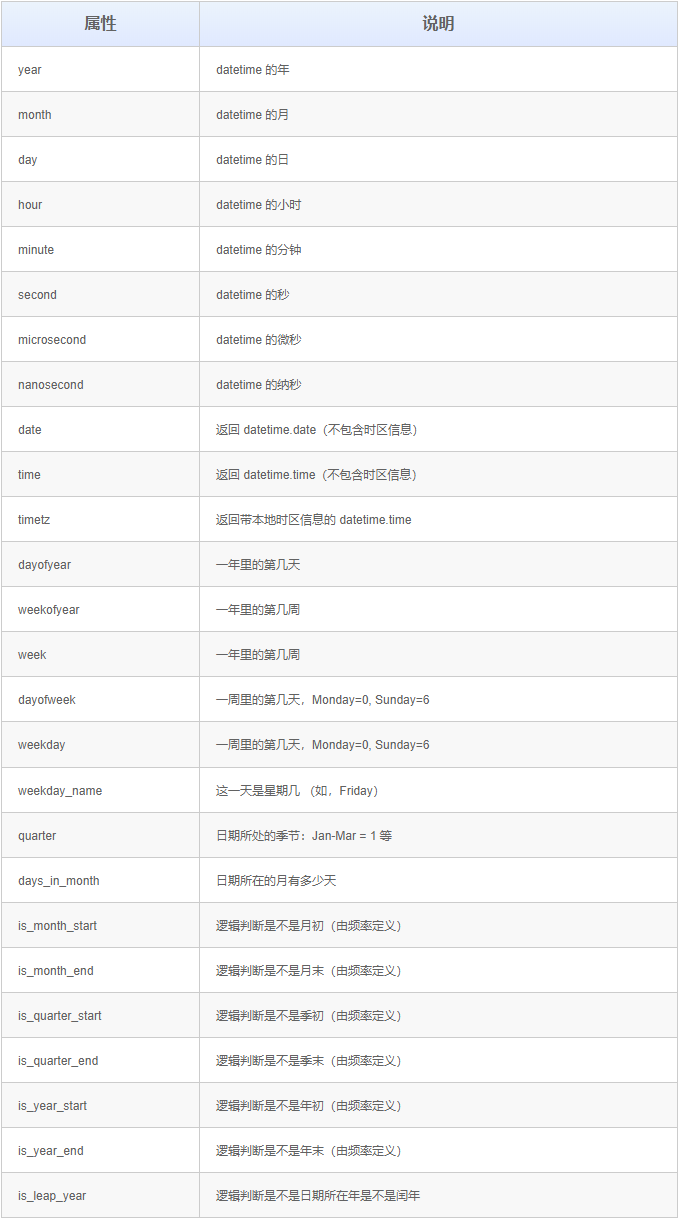

In [81]:
idx0 = ts2.index[0]
idx0

Timestamp('2011-01-02 00:00:00', freq='W-SUN')

In [82]:
print(idx0.year, idx0.month, idx0.day, idx0.hour, idx0.minute, idx0.second, idx0.microsecond)

2011 1 2 0 0 0 0


In [85]:
print(idx0.dayofyear, idx0.weekofyear, idx0.week, idx0.dayofweek, idx0.weekday())

2 52 52 6 6
